In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [2]:
tweets = pd.read_json('james_franco_lex_pol.json')
tweets.sort_values(by='timestamp', inplace=True)
startDate = date(2017, 12, 15)
endDate = date(2018, 2, 15)

tweets['timestamp'] = pd.to_datetime(tweets['timestamp']).apply(lambda x: x.date())

tweets_stub = tweets[tweets['timestamp'] >= startDate]
tweets_stub = tweets_stub[tweets_stub['timestamp'] <= endDate]
tweets_stub.sort_values(by='timestamp', inplace=True)

df = tweets_stub.groupby(['timestamp', 'lexicon_polarity']).size()
df = df.reset_index()
df.columns = ['timestamp', 'polarity', 'size']

Text(0,0.5,'Number of Tweets')

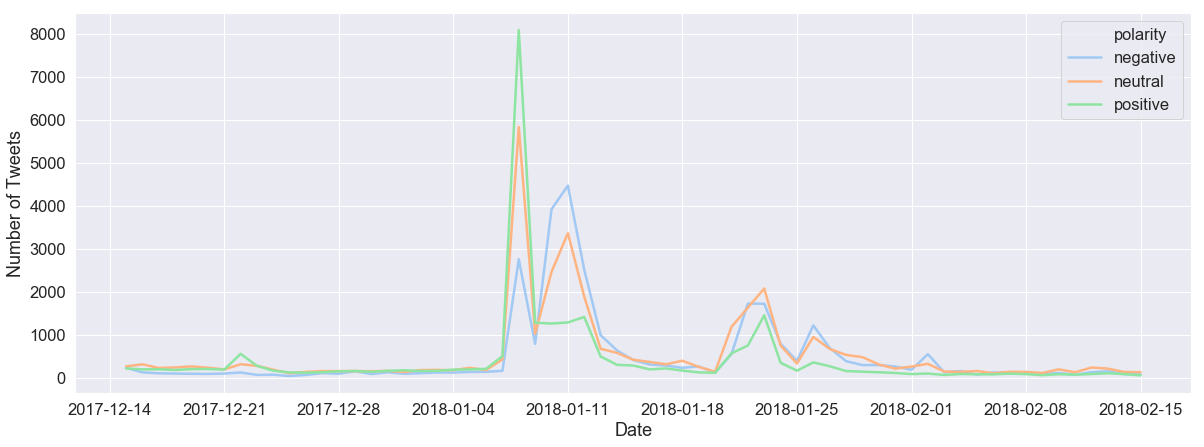

In [10]:
a4_dims = (20, 7)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.lineplot(ax = ax, x='timestamp', y='size', hue='polarity', palette='pastel', data=df)
ax.set_xlabel("Date")
ax.set_ylabel("Number of Tweets")